# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

** В случае ответов от api.hh.ru с ошибками типа "Captcha" постарайтесь их обработать, например, с помощью time.sleep или изменения ip-адреса

In [1]:
import requests
from tqdm.auto import tqdm
import json
import time
import pandas as pd

In [2]:
url = f'https://api.hh.ru/areas/113'
res = requests.get(url)
vacancies = res.json()
areas = list(set([i.get('id') for i in vacancies.get('areas')]))

In [3]:
len(areas)

88

In [4]:
i = 0
areas_id = []
while i < len(areas):
    try:
        url = 'https://api.hh.ru/vacancies?employer_id=3529&area='+str(areas[i])
        res = requests.get(url)
        region = res.json()
        found_cnt = region.get('found')
        areas_id.append([int(areas[i]), found_cnt])
        i += 1
    except:
        i += 1
print(len(areas_id))

88


In [5]:
data = [item for item in [areas_id[i] for i in range(len(areas_id))] if item[1] > 0]
len(data)

81

In [6]:
data = sorted(data, key=lambda item: item[1], reverse=True)
data[0]

[1, 1419]

In [7]:
#Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000,
#подумайте как его обойти)
#получили все ИД вакансий Сбера
all_vacancy_ids = []
for x in tqdm(range(len(data))):
    i =  0 
    area = data[x][0]
    stop = 0
    while stop < 2000 and stop < data[x][1]:
        try:
            url = f'https://api.hh.ru/vacancies?employer_id=3529&page={i}&per_page=100&area={area}'
            res = requests.get(url)
            vacancies = res.json()
            vacancy_ids = [el.get('id') for el in vacancies.get('items')]
            all_vacancy_ids.extend(vacancy_ids)
            stop += len(vacancy_ids)
            time.sleep(1)
            i += 1
        except:
            i += 1
    time.sleep(3)
len(all_vacancy_ids)

  0%|          | 0/81 [00:00<?, ?it/s]

6552

In [8]:
all_vacancy_ids[-1]

'78533138'

In [9]:
#Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
all_vacancy_description = []
j = 0
for i in tqdm(all_vacancy_ids):
    vac_id = i
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    if 'errors' not in vacancy:
        all_vacancy_description.append(vacancy)  
        j += 1
        if j % 118 == 0:
            time.sleep(60)
        else:
            continue
    else:
        break

len(all_vacancy_description)

  0%|          | 0/6552 [00:00<?, ?it/s]

6552

In [10]:
df_data = pd.DataFrame(all_vacancy_description)

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [25]:
data = df_data[['published_at', 'name', 'description', 'key_skills']]
data.head()

,published_at,name,description,key_skills
0,2023-03-15T10:26:21+0300,Project Manager в команду Импортозамещение Циф...,<p>Импортозамещение и КИБ являются одним из кл...,"[{'name': 'Деловая коммуникация'}, {'name': 'О..."
1,2023-03-14T10:39:55+0300,Project Manager в команду Проектного офиса Циф...,<p><strong>Описание направления:</strong></p> ...,"[{'name': 'Управление проектами'}, {'name': 'А..."
2,2023-03-15T10:25:03+0300,Руководитель проектов на интеграционные програ...,<p><strong>Чем предстоит заниматься:</strong><...,[{'name': 'Управление проектами'}]
3,2023-03-15T12:28:42+0300,Менеджер проектов в команду Салют Экраны B2B2C...,<p>Мы – активная и амбициозная команда в СберД...,[]
4,2023-03-28T19:44:40+0300,Product Owner в Премиальном сегменте СберПервый,<p>Мы ищем талантливого и опытного Product Own...,[]


In [26]:
data['published_at'] = data['published_at'].str.replace(r'+0300', '', regex=False)
data['published_at'] = pd.to_datetime(data['published_at'])
data.head()

,published_at,name,description,key_skills
0,2023-03-15 10:26:21,Project Manager в команду Импортозамещение Циф...,<p>Импортозамещение и КИБ являются одним из кл...,"[{'name': 'Деловая коммуникация'}, {'name': 'О..."
1,2023-03-14 10:39:55,Project Manager в команду Проектного офиса Циф...,<p><strong>Описание направления:</strong></p> ...,"[{'name': 'Управление проектами'}, {'name': 'А..."
2,2023-03-15 10:25:03,Руководитель проектов на интеграционные програ...,<p><strong>Чем предстоит заниматься:</strong><...,[{'name': 'Управление проектами'}]
3,2023-03-15 12:28:42,Менеджер проектов в команду Салют Экраны B2B2C...,<p>Мы – активная и амбициозная команда в СберД...,[]
4,2023-03-28 19:44:40,Product Owner в Премиальном сегменте СберПервый,<p>Мы ищем талантливого и опытного Product Own...,[]


In [37]:
data['description'] = data['description'].replace('[^а-яА-Яa-zA-Z0-9 ]', '', regex=True)
data['key_skills'] = data['key_skills'].astype(str).replace('[^а-яА-Яa-zA-Z0-9, ]', '', regex=True)
data['key_skills'] = data['key_skills'].replace('name', '', regex=True)
data.head()

,published_at,name,description,key_skills,published_date,weekday
0,2023-03-15 10:26:21,Project Manager в команду Импортозамещение Циф...,pИмпортозамещение и КИБ являются одним из ключ...,"Деловая коммуникация, Организаторские навыки...",2023-03-15,Wednesday
1,2023-03-14 10:39:55,Project Manager в команду Проектного офиса Циф...,pstrongОписание направленияstrongp ul liВнедре...,"Управление проектами, Английский язык, Atla...",2023-03-14,Tuesday
2,2023-03-15 10:25:03,Руководитель проектов на интеграционные програ...,pstrongЧем предстоит заниматьсяstrongp ul liВе...,Управление проектами,2023-03-15,Wednesday
3,2023-03-15 12:28:42,Менеджер проектов в команду Салют Экраны B2B2C...,pМы активная и амбициозная команда в СберДева...,,2023-03-15,Wednesday
4,2023-03-28 19:44:40,Product Owner в Премиальном сегменте СберПервый,pМы ищем талантливого и опытного Product Owner...,,2023-03-28,Tuesday


In [28]:
data['published_date'] = data['published_at'].dt.date
data.head()

,published_at,name,description,key_skills,published_date
0,2023-03-15 10:26:21,Project Manager в команду Импортозамещение Циф...,pИмпортозамещение и КИБ являются одним из ключ...,"name Деловая коммуникация, name Организаторски...",2023-03-15
1,2023-03-14 10:39:55,Project Manager в команду Проектного офиса Циф...,pstrongОписание направленияstrongp ul liВнедре...,"name Управление проектами, name Английский язы...",2023-03-14
2,2023-03-15 10:25:03,Руководитель проектов на интеграционные програ...,pstrongЧем предстоит заниматьсяstrongp ul liВе...,name Управление проектами,2023-03-15
3,2023-03-15 12:28:42,Менеджер проектов в команду Салют Экраны B2B2C...,pМы активная и амбициозная команда в СберДева...,,2023-03-15
4,2023-03-28 19:44:40,Product Owner в Премиальном сегменте СберПервый,pМы ищем талантливого и опытного Product Owner...,,2023-03-28


In [29]:
to_plot = pd.DataFrame(data['published_date'].value_counts())
to_plot.head()

,published_date
2023-03-28,1469
2023-03-22,358
2023-03-27,346
2023-03-24,297
2023-03-23,280


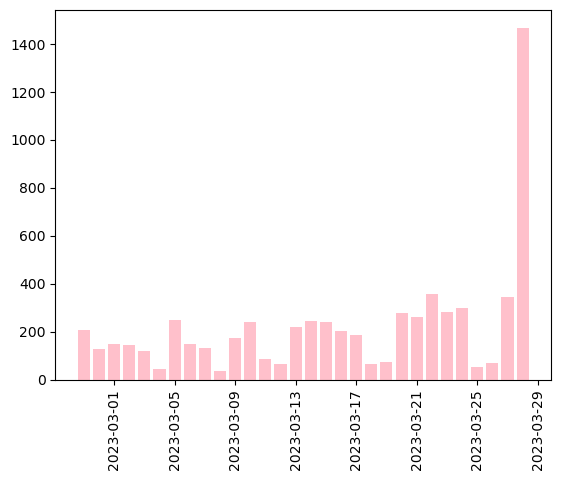

In [30]:
#Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
import matplotlib.pyplot as plt

plt.bar(to_plot.index, to_plot['published_date'], color='pink', align='center')
plt.xticks(rotation = 'vertical')
plt.show()

In [31]:
def get_weekday(x):
    if x.weekday() == 0:
        return 'Monday'
    elif x.weekday() == 1:
        return 'Tuesday'
    elif x.weekday() == 2:
        return 'Wednesday'
    elif x.weekday() == 3:
        return 'Thursday'
    elif x.weekday() == 4:
        return 'Friday'
    elif x.weekday() == 5:
        return 'Saturday'
    elif x.weekday() == 6:
        return 'Sunday'

In [32]:
data['weekday'] = data['published_date'].apply(lambda x: get_weekday(x))
data.head()

,published_at,name,description,key_skills,published_date,weekday
0,2023-03-15 10:26:21,Project Manager в команду Импортозамещение Циф...,pИмпортозамещение и КИБ являются одним из ключ...,"name Деловая коммуникация, name Организаторски...",2023-03-15,Wednesday
1,2023-03-14 10:39:55,Project Manager в команду Проектного офиса Циф...,pstrongОписание направленияstrongp ul liВнедре...,"name Управление проектами, name Английский язы...",2023-03-14,Tuesday
2,2023-03-15 10:25:03,Руководитель проектов на интеграционные програ...,pstrongЧем предстоит заниматьсяstrongp ul liВе...,name Управление проектами,2023-03-15,Wednesday
3,2023-03-15 12:28:42,Менеджер проектов в команду Салют Экраны B2B2C...,pМы активная и амбициозная команда в СберДева...,,2023-03-15,Wednesday
4,2023-03-28 19:44:40,Product Owner в Премиальном сегменте СберПервый,pМы ищем талантливого и опытного Product Owner...,,2023-03-28,Tuesday


In [33]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
data['weekday'].value_counts()

Tuesday      2233
Monday       1197
Friday        844
Thursday      797
Wednesday     778
Sunday        455
Saturday      248
Name: weekday, dtype: int64

In [34]:
#Найдите вакансии с использованием python, которые вам интересны
s = 'аналитик'.lower()
key_skills = 'python'

In [38]:
t1 = data.name.str.lower().str.contains(s)
t2 = data.key_skills.str.lower().str.contains(key_skills)
python_vac = data[t1 & t2].reset_index(drop=True)

Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
Постройте график наиболее востребованных навыков

In [39]:
python_vac['key_skills']

0                                          SQL,  Python
1                                       Python,  MS SQL
2      Статистический анализ,  Qlik Sense,  Математи...
3              SQL,  Python,  PostgreSQL,  MS SQL,  Git
4                                          SQL,  Python
5                          Python,  SQL,  Анализ данных
6      MS SQL,  PostgreSQL,  ClickHouse,  Metabase, ...
7      Математический анализ,  MS SQL,  Python,  AB ...
8      Python,  SQL,  Data Mining,  Oracle BI,  Анал...
9      Excel,  Python,  Hadoop,  Hive,  Impala,  Spa...
10     ETL,  PostgreSQL,  DWH,  Базы данных,  Анализ...
Name: key_skills, dtype: object

In [42]:
import collections
c = collections.Counter()
for i in range(len(python_vac['key_skills'])):
    for j in str(python_vac['key_skills'].iloc[i]).split(','):
        c[j] += 1
print(c)     

Counter({'  Python': 8, '  SQL': 5, '  Анализ данных': 4, ' SQL': 3, ' Python': 3, '  MS SQL': 3, '  PostgreSQL': 3, '  Математическая статистика': 2, '  AB тесты': 2, '  Hadoop': 2, '  Spark': 2, ' Статистический анализ': 1, '  Qlik Sense': 1, '  Аналитическое мышление': 1, '  Английский язык': 1, '  Git': 1, ' MS SQL': 1, '  ClickHouse': 1, '  Metabase': 1, '  Tableau': 1, ' Математический анализ': 1, '  Data Mining': 1, '  Oracle BI': 1, ' Excel': 1, '  Hive': 1, '  Impala': 1, '  Сбер': 1, '  Data Analysis': 1, ' ETL': 1, '  DWH': 1, '  Базы данных': 1, '  Системный анализ': 1, '  SCALA': 1, '  Big Data': 1})


In [43]:
skil = pd.DataFrame(c,index=['cnt']).transpose()
skil = skil.sort_values(by = 'cnt', ascending = False)[0:5]
skil

,cnt
Python,8
SQL,5
Анализ данных,4
SQL,3
PostgreSQL,3


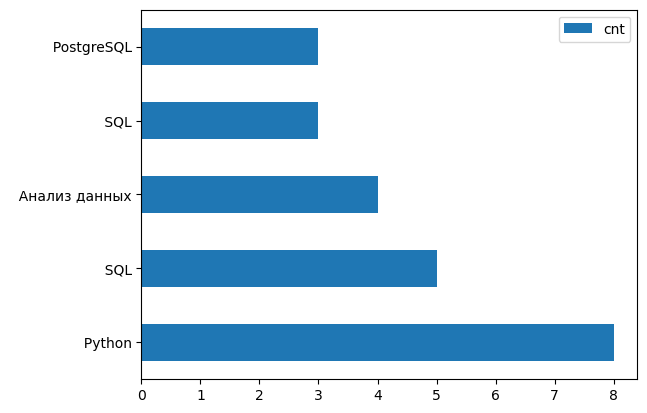

In [44]:
skil.nlargest(5, 'cnt').set_index(skil.index).plot(kind='barh');